## Linear Regression

Linear regression is a simple approach for supervised learning. We are going to use
linear regression to predict the price of a house given it's size and the number
of bedrooms it has.


In [1]:
import numpy as np
import pandas as pd
from ipywidgets import *
import matplotlib.pyplot as graph

df = pd.read_csv('houses.csv')
df

,area,price
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


The above dataset will be our training set. **size** is the input variable. Input variables also referred to as
features, predictors or independent variables. **price** is our output or target
variable.

The essence of machine learning is to find a model that **maps** input variables to target variables.
Let $X$ denote the input variable space and $Y$ denote the output variable spaces, then the point of
machine learning is to find a function $h:X \mapsto Y$ such that $h(x)$ is a good predictor
for the corresponding value of y. This function $h$ is called a **hypothesis**


Plotting our training set

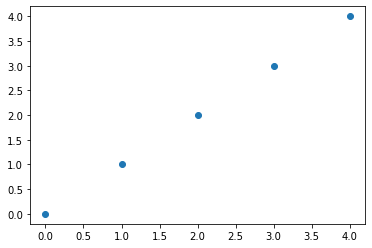

In [2]:
%matplotlib inline
graph.scatter(df.area, df.price)

In this case, we can approximate $h$ as a linear function which means that it is a
straight line when plotted.

For purposes of simplicity let's define $h(x)$  as $h(x) = \theta x_1$

$\theta$ parameterizes $h$. The task now is to find $\theta$ such that we get a prediction value
closest to the real price value.

We can express the hypothesis function in Python as below

In [3]:
def hypothesis(theta, x):
    return theta * x


## Cost Function
The **cost function** measures how close our prediction is to the real value. It is defined as

$$ J(\theta)=\frac{1}{2m}\sum(h(x_i)-y_i)^2$$
where $$h(x_i)$$ is the prediction for the ith entry in our training set.

Writing the cost function in Python

In [4]:
def cost_function(theta, training_data):
    result = 0
    for index, training_set in training_data.iterrows():
        predicted = hypothesis(theta, training_set['area'])
        square_diff = (predicted - training_set['price']) ** 2
        result = square_diff / (2 * len(training_data.index))
    return result


In this case a $\theta$ value of 1, means that our prediction is exactly the same as the real
value, therefore, the mean squared difference between our predicted and real values should be 0.
In the snippet below, we see that the further we move from 1, the less accurate our prediction becomes.

In [5]:
print('theta=1: result=', cost_function(1, df))
print('theta=1.5: result=', cost_function(1.5, df))
print('theta=2: result=', cost_function(2, df))

theta=1: result= 0.0
theta=1.5: result= 0.4
theta=2: result= 1.6


## Visualising Hypothesis and Cost Function

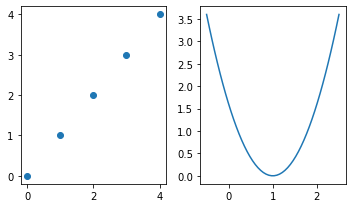

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.update(w=1.0)>

In [6]:
x1 = np.linspace(0.0, 5.0)
y1 = np.linspace(0.0, 5.0)

x2 = np.linspace(-0.5, 2.5)
y2 = [cost_function(x, training_data=df) for x in x2]

fig, axes = graph.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].scatter(df.area, df.price)
axes[1].plot(x2, y2)
fig.tight_layout()

def update(w = 1.0):
    axes[0].plot(df.area, w*df.price, color='red')
    graph.show()

interact(update)